In [166]:
# common imports

import matplotlib.pyplot as plt

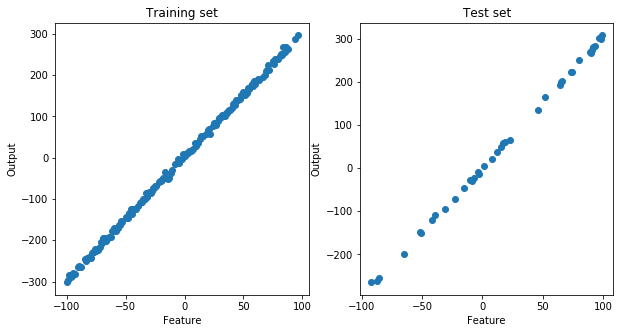

In [277]:
# generate a dataset

import random

def f(x):
    slope = 3
    yIntersept = 4
    return (slope * x) + yIntersept + random.normalvariate(0, 5)

features = range(-100, 100)
outputs = list(map(f, features))

allDataSet = list(zip(features, outputs))
random.shuffle(allDataSet)
trainingSet = allDataSet[:160]
testSet = allDataSet[161:]

# plot data sets
fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

pltLeft.title.set_text('Training set')
pltLeft.set_xlabel('Feature')
pltLeft.set_ylabel('Output')
pltLeft.scatter(*zip(*trainingSet))

pltRight.title.set_text('Test set')
pltRight.set_xlabel('Feature')
pltRight.set_ylabel('Output')
pltRight.scatter(*zip(*testSet))

In [260]:
# introduce a cost function

def predict(feature, parameters):
    # TODO: vectorize in more complex case
    return parameters[0] + (parameters[1] * feature)

def calcSquaredDiff(example, parameters):
    diff = predict(example[0], parameters) - example[1]
    return diff ** 2

def cost(dataSet, parameters):
    squaredDiff = map(lambda example: calcSquaredDiff(example, parameters), dataSet)
    return sum(squaredDiff) / (2 * len(dataSet))


# unit tests
print(f'predict = {predict(3, [1, 2]) == 7}')
print(f'calcSquaredDiff = {calcSquaredDiff([3, 2], [1, 2]) == 25}')
print(f'cost = {cost([(1, 2), (2, 5)], [0, 0]) == 7.25}')

predict = True
calcSquaredDiff = True
cost = True


Text(0,0.5,'parameter 1')

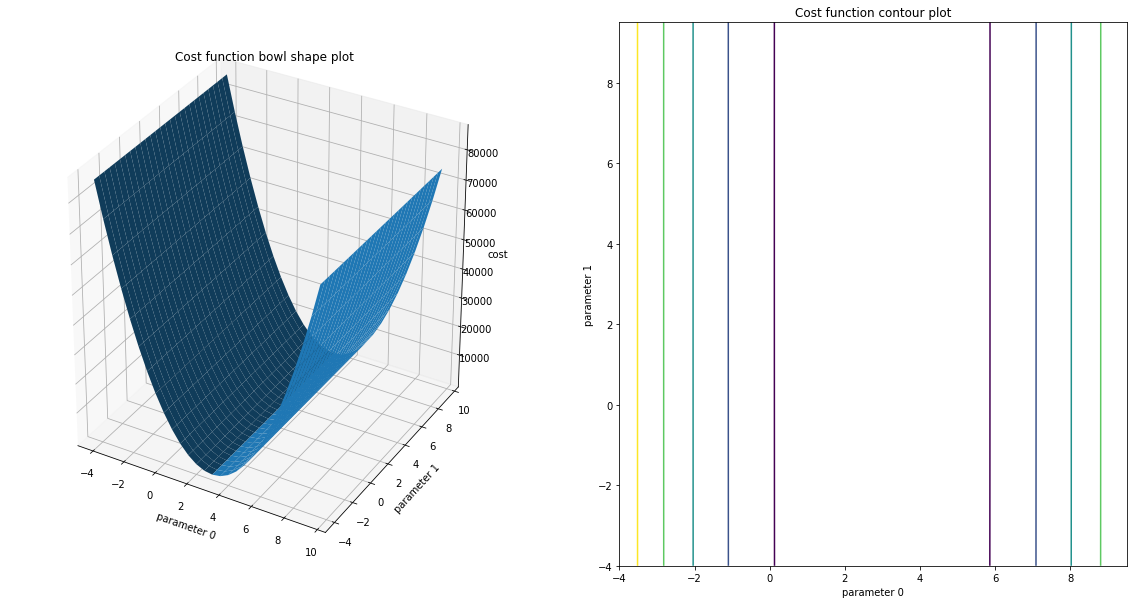

In [267]:
# bowl shape and contour plots
# TODO: why isn't the bowl shape really bowl shaped

import numpy as np
from mpl_toolkits import mplot3d

# prepare cost function data for potting
bowlShape_cost = []
bowlShape_parameters = np.arange(-4, 10, 0.5)
bowlShape_parameters0, bowlShape_parameters1 = np.meshgrid(bowlShape_parameters, bowlShape_parameters)

for parameter0 in bowlShape_parameters:
    bowlShape_cost_vector = []
    
    for parameter1 in bowlShape_parameters:
        bowlShape_cost_vector.append(cost(trainingSet, [parameter0, parameter1]))
    
    bowlShape_cost.append(bowlShape_cost_vector)

bowlShape_cost = np.matrix(bowlShape_cost)

# plot the cost function
fig = plt.figure(figsize=(20, 10))

pltLeft = fig.add_subplot(1, 2, 1, projection='3d')
pltLeft.plot_surface(bowlShape_parameters0, bowlShape_parameters1, bowlShape_cost)
pltLeft.set_title('Cost function bowl shape plot')
pltLeft.set_xlabel('parameter 0')
pltLeft.set_ylabel('parameter 1')
pltLeft.set_zlabel('cost')

pltRight = fig.add_subplot(1, 2, 2)
pltRight.contour(bowlShape_parameters0, bowlShape_parameters1, bowlShape_cost)
pltRight.set_title('Cost function contour plot')
pltRight.set_xlabel('parameter 0')
pltRight.set_ylabel('parameter 1')

In [262]:
# minimize the cost function

# <-- cost function derivatives -->
def costPrime(example, parameters):
    return (predict(example[0], parameters) - example[1]) * example[0]
def costPrimeBias(example, parameters):
    return (predict(example[0], parameters) - example[1])
# </- cost function derivatives -->

def loss(dataSet, parameters, costPrimeFunc):
    errors = map(lambda example: costPrimeFunc(example, parameters), dataSet)
    return sum(errors) / len(dataSet)

def minimize(dataSet, parameters, learningRate):    
    parameters[0] -= learningRate * loss(dataSet, parameters, costPrimeBias)
    parameters[1] -= learningRate * loss(dataSet, parameters, costPrime)
    
    return parameters


# unit tests
print(f'costPrime = {costPrime([3, 2], [1, 2]) == 15}')
print(f'costPrimeBias = {costPrimeBias([3, 2], [1, 2]) == 5}')
print(f'loss = {loss([(3, 2), (5, 1)], [1, 2], costPrime) == 32.5}')
print(f'loss = {loss([(3, 2), (5, 1)], [1, 2], costPrimeBias) == 7.5}')
print(f'minimize = {minimize([(3, 2), (5, 1)], [1, 2], 0.001) == [0.9925, 1.96753]}')

costPrime = True
costPrimeBias = True
loss = True
loss = True
minimize = True


Error: (34, 'Result too large') with learning rate = 0.01
Error: (34, 'Result too large') with learning rate = 0.03
Error: (34, 'Result too large') with learning rate = 0.001
Error: (34, 'Result too large') with learning rate = 0.003

Best learning rate = 0.0003


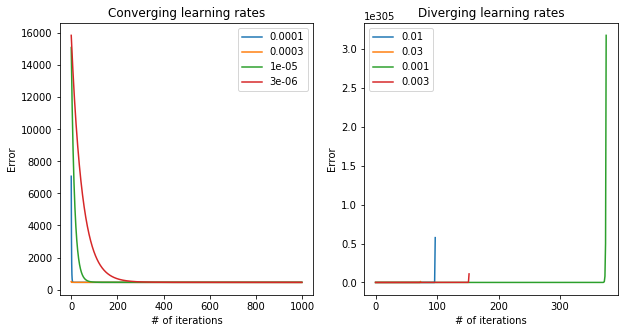

In [268]:
# try different learning rates

def tryLearningRate(dataSet, learningRate):
    parameters = [0, 0]
    errorOverIterations = []
    for iterationNumber in range(1000):
        parameters = minimize(dataSet, parameters, learningRate)
        try:
            error = cost(trainingSet, parameters)
        except BaseException as e:
            print(f'Error: {e} with learning rate = {learningRate}')
            break

        errorOverIterations.append((iterationNumber, error))
    
    return errorOverIterations

def tryLearningRates(learningRates, plot):
    for learningRate in learningRates:
        errorOverIterations = tryLearningRate(trainingSet, learningRate)
        plot.plot(*zip(*errorOverIterations), label=learningRate)



fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

# <-- converging learning rates -->
tryLearningRates([0.0001, 0.0003, 0.00001, 0.000003], pltLeft)
pltLeft.title.set_text('Converging learning rates')
pltLeft.set_xlabel('# of iterations')
pltLeft.set_ylabel('Error')
pltLeft.legend()
# </- converging learning rates -->

# <-- diverging learning rates -->
tryLearningRates([0.01, 0.03, 0.001, 0.003], pltRight)
pltRight.title.set_text('Diverging learning rates')
pltRight.set_xlabel('# of iterations')
pltRight.set_ylabel('Error')
pltRight.legend()
# </- diverging learning rates -->

learningRate = 0.0003
print(f'\nBest learning rate = {learningRate}')

improvement = 9.997753203094817e-07 in 13758 iterations
Learned parameters = [3.398506495204275, 3.000686521695839]


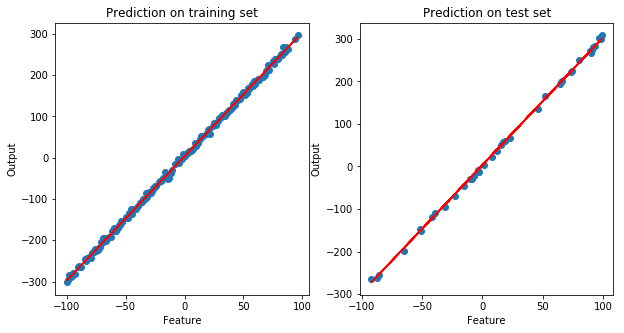

In [280]:
# learn the parameters

def learn(dataSet, learningRate):
    parameters = [0, 0]
    jOverIterations = []
    error = cost(trainingSet, parameters)
    prevError = 0
    improvement = None
    numberOfIterationsPassed = 0
    while True:
        numberOfIterationsPassed += 1
        prevError = error
        parameters = minimize(dataSet, parameters, learningRate)
        error = cost(trainingSet, parameters)
        improvement = prevError - error
        if improvement < 0.000001:
            break
    
    print(f'improvement = {improvement} in {numberOfIterationsPassed} iterations')
    return parameters


parameters = learn(trainingSet, 0.0003)
print(f'Learned parameters = {parameters}')


# plot predictions
def makePrediction(features):
    return list(map(lambda example: predict(example, parameters), features))

fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

# <-- plot prediction on training set ->
pltLeft.title.set_text('Prediction on training set')
pltLeft.set_xlabel('Feature')
pltLeft.set_ylabel('Output')
pltLeft.scatter(*zip(*trainingSet))

trainingFeatures = list(zip(*trainingSet))[0]
trainingOutputs = makePrediction(trainingFeatures)
pltLeft.plot(trainingFeatures, trainingOutputs, 'r')
# </- plot prediction on training set ->

# <-- plot prediction on test set ->
pltRight.title.set_text('Prediction on test set')
pltRight.set_xlabel('Feature')
pltRight.set_ylabel('Output')
pltRight.scatter(*zip(*testSet))

testFeatures = list(zip(*testSet))[0]
testOutputs = makePrediction(testFeatures)
pltRight.plot(testFeatures, testOutputs, 'r')
# </- plot prediction on test set ->

Training set size = 1
improvement = -37.8911862726784 in 4 iterations
TrainingSet error = 4.167365476549079 TestSet error = 44.363907637834025

Training set size = 11
improvement = 9.172392267942087e-07 in 9858 iterations
TrainingSet error = 111.19026133111856 TestSet error = 9.46439709446987

Training set size = 21
improvement = -0.00010380378505914223 in 23 iterations
TrainingSet error = 121.46705874142994 TestSet error = 18.191055189523347

Training set size = 31
improvement = 8.803755413566705e-07 in 8602 iterations
TrainingSet error = 119.96057534661234 TestSet error = 9.867465389520971

Training set size = 41
improvement = -9.111690049934396e-05 in 39 iterations
TrainingSet error = 138.44252222271376 TestSet error = 28.167853834995494

Training set size = 51
improvement = 9.999332242216497e-07 in 67107 iterations
TrainingSet error = 127.39726248623063 TestSet error = 17.605094501050136

Training set size = 61
improvement = 9.999052821285659e-07 in 47877 iterations
TrainingSet err

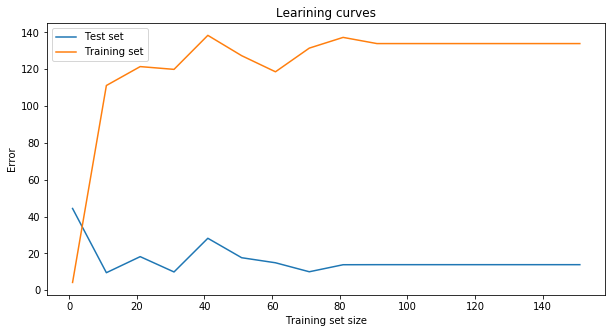

In [285]:
# plot the learning curves

testSetLearningCurve = []
trainingSetLearningCurve = []
for trainingSetSize in range(1, len(trainingSet), 10):
    print(f'Training set size = {trainingSetSize} Test set size = {}')
    learningCurveDataSet = dataSet[:trainingSetSize]
    parameters = learn(learningCurveDataSet, 0.0003)
    
    testSetError = cost(testSet, parameters)
    testSetLearningCurve.append((trainingSetSize, testSetError))
    
    trainingSetError = cost(learningCurveDataSet, parameters)
    trainingSetLearningCurve.append((trainingSetSize, trainingSetError))
    print(f'TrainingSet error = {trainingSetError} TestSet error = {testSetError}')
    print()


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(*zip(*testSetLearningCurve), label='Test set')
ax.plot(*zip(*trainingSetLearningCurve), label='Training set')

ax.title.set_text('Learining curves')
ax.set_xlabel('Training set size')
ax.set_ylabel('Error')
ax.legend()

# TODO: k-fold validation